# DAT 402 Project 2

# Part One 
For part one of my second project, I chose to analyze the "Date Fruit Dataset" from Kaggle.com (https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets) My goal with this model is to be able to correctly classify dates based on measurements and features of each date class. Along with this, I want to identify key features that influence my models and use these singled out features to more accurately predict the class of date with a different model. 

In part two, I attempt to create a nueral network model to classify a picture of either a cat or a dog. We will come to that later. 

My first project revolved around mostly around binary data, so I wanted to use numerical data this time to try something a little different. Let's get started, first we need to import the neccesary libraries. 

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,RocCurveDisplay
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv('Copy of Date_Fruit_Datasets.csv')

In [2]:
#quick glance at data

df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


# Data Cleaning

This dataset did not have any issues with quality and 'cleanliness'. Which I am very thankful for, so below, I have just some simple inspections of the data to check that it is in fact clean and usable. 

First, finding out our data types in the dataset, they are all int or float, which is perfect, so nothing needs to changed here. 

In [3]:
#checking data types in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [4]:
#checking if there are any null values

df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

No NA values, so we will move on.

In [5]:
#quick look at summary stats for dataset

df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


# EDA

For this brief EDA, I plot out some characteristics of the data, in order to see some trends or correlations of the data. 

Below, I have a comparison between date types based on the count of each. We can see that we have 3 types that are near or above the 175 count, while the other 4 barely break 75. One thing to take from this is to watch out for is disproportionate data that could possibly influence the outcome of the model, something I experienced in my preivous project.

[Text(0.5, 1.0, 'Count of Date Type')]

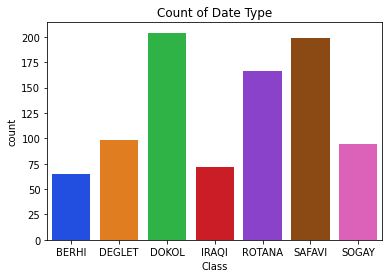

In [6]:
#plot for count of each date type

sns.countplot(data = df, x= 'Class', palette = 'bright').set(title='Count of Date Type')

[Text(0.5, 1.0, 'Area vs Perimeter by Date Type')]

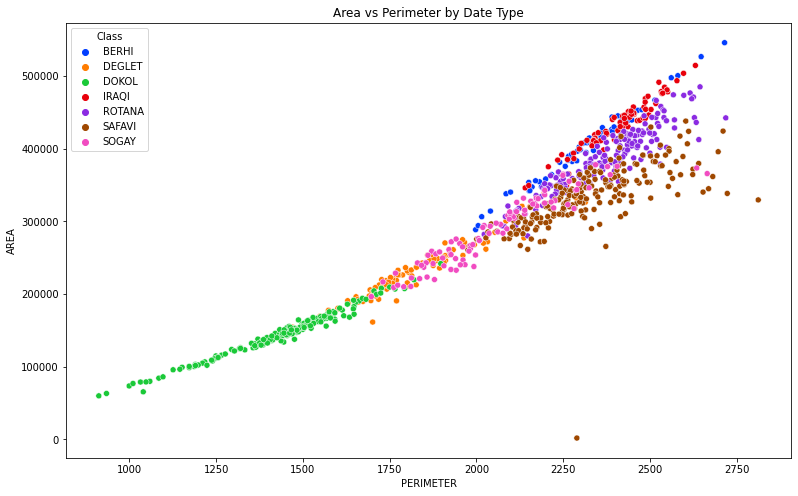

In [7]:
#scatterplot of area vs perimeter by date type

plt.figure(figsize=(13,8))
sns.scatterplot(data = df, x = 'PERIMETER', y= 'AREA', hue = 'Class', palette = 'bright', legend = 'auto').set(title = 'Area vs Perimeter by Date Type')

From our graph above we can see a strong relationship between **Perimeter** and **Area**, but I think it is also interesting to see that the class of date is grouped very neatly as the scatterplot moves forward. The relationship is expected as a bigger perimeter would take up a larger area. These features were used because they need no further explination on what they are. Others in the dataset need some explaining on what they mean, which sadly I could not find anywhere. Some can be interpreted, but others are more difficult. 

<Figure size 864x576 with 0 Axes>

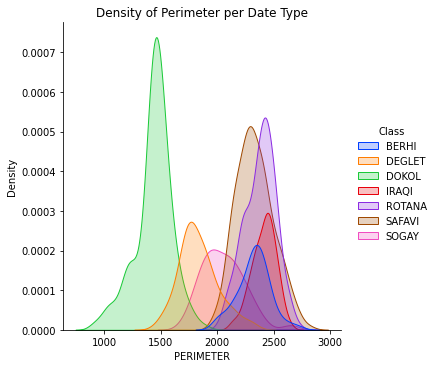

In [8]:
#density plot of perimeter per date type

plt.figure(figsize = (12,8))
sns.displot(data = df, x = 'PERIMETER', kind = 'kde', hue = 'Class', palette = 'bright', fill = True).set(title = 'Density of Perimeter per Date Type')

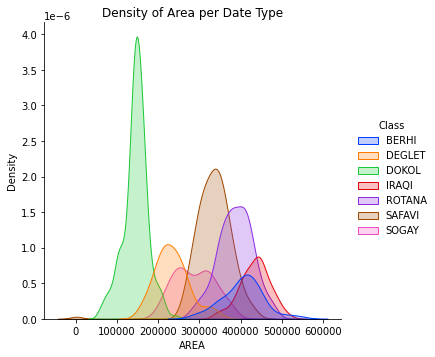

In [9]:
#density plot of area per date type

sns.displot(data = df, x = 'AREA', kind = 'kde', hue = 'Class', palette = 'bright', fill = True).set(title = 'Density of Area per Date Type')

Using **AREA** and **PERIMETER** again, I wanted to see the distributions of each feature, we can see that DOKOL Dates are very dense with their **AREA** and **PERIMETER**, while another date type such as **SOGAY**, is more spread out. 

My first initial thought is that **PERIMETER** and **AREA** will be important indicators in our models. Let's find out below.

# Model Training and Data Manipulation

For my first model, I chose to use a desicion tree. Using this, I want to see what features have more weight in the classification of the date type. Then, I can reduce the number of features in the dataset based on that output to hopefully get better accuracy in classification. 

In [10]:
#creating features and classes

X = df.drop(columns = 'Class')
y = df['Class']

#list of all feature names to show importance later

column_names_full = X.columns.tolist()

In [11]:
# scaling data, make 2 scaled feature sets, 1 pre drop 1 post drop

scaler = StandardScaler()
scaler.fit(X)
X_scaled_full = scaler.transform(X)

In [12]:
#creating train/test sets with all features attached

X_train, X_test, y_train, y_test = train_test_split(X_scaled_full,y,test_size = .25, random_state = 42)

#creating model and using gridsearch to find best depth for tree

dtree = DecisionTreeClassifier(random_state=42)
parameters = {"max_depth": range(1,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters, cv=5)

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_
best_depth

{'max_depth': 5}

In [13]:
#Fitting and Training dtree model with best depth parameter from gridsearch

dtree = DecisionTreeClassifier(random_state=42, max_depth = best_depth['max_depth'])

dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

#print accuracy of model

print('Training Accuracy: ' +str(dtree.score(X_train,y_train)))
print('Testing Accuracy: ' +str(accuracy_score(yhat, y_test)))

Training Accuracy: 0.8855869242199108
Testing Accuracy: 0.8222222222222222


In [14]:
#listing out importance of features for decision tree

importance = pd.DataFrame(dtree.feature_importances_, index = column_names_full, columns = ['Importance'])
importance.sort_values(by = "Importance", ascending = False)

,Importance
MeanRR,0.338109
CONVEX_AREA,0.249920
SkewRB,0.216362
MINOR_AXIS,0.126340
SHAPEFACTOR_1,0.021572
EXTENT,0.012865
AREA,0.010889
EntropyRB,0.007444
ROUNDNESS,0.007432
ALLdaub4RG,0.005351


With the first model done, we can see that more than half of the features in the dataset have little to no importance to the model in classification of date type. 

With this information, I will now drop the features that have an importance value of 0. Let's try our desicion tree model again with a reduced number of features to see if we can imporove our accuracy score. 

In [15]:
#dropping features based off of inital dtree model importance 

X_drop = ['EntropyRG','StdDevRB','EntropyRR','ALLdaub4RR','KurtosisRB','KurtosisRG','KurtosisRR','SkewRG', 'SkewRG','MeanRG','StdDevRG','StdDevRR','MeanRB','PERIMETER','SHAPEFACTOR_4','SHAPEFACTOR_3','SHAPEFACTOR_2','COMPACTNESS','ASPECT_RATIO','SOLIDITY','EQDIASQ','MAJOR_AXIS','ALLdaub4RB']

X.drop(X_drop, axis = 1, inplace = True)


In [16]:
#scale data again here before we train and test, due to numpy array conversion issues. 

scaler.fit(X)
X_scaled = scaler.transform(X)

In [17]:
#training and testing again without features of 0 importance 

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = .25, random_state = 42)

dtree = DecisionTreeClassifier(random_state=42)
parameters = {"max_depth": range(1,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters, cv=5)

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_
best_depth

{'max_depth': 7}

In [18]:
#training and testing again without features of 0 importance

dtree = DecisionTreeClassifier(random_state=42, max_depth = best_depth['max_depth'])

dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

#print accuracy and classification_report

print('Training Accuracy: ' +str(dtree.score(X_train,y_train)))
print('Testing Accuracy: ' +str(accuracy_score(yhat, y_test)))
print(' ')

print('Logistic Regression' + '\n')
print(classification_report(y_test,yhat))

Training Accuracy: 0.9405646359583952
Testing Accuracy: 0.8355555555555556
 
Logistic Regression

              precision    recall  f1-score   support

       BERHI       0.67      0.40      0.50        15
      DEGLET       0.58      0.75      0.65        24
       DOKOL       0.96      0.92      0.94        60
       IRAQI       0.57      0.92      0.71        13
      ROTANA       0.95      0.84      0.89        45
      SAFAVI       1.00      0.98      0.99        42
       SOGAY       0.69      0.69      0.69        26

    accuracy                           0.84       225
   macro avg       0.78      0.79      0.77       225
weighted avg       0.85      0.84      0.84       225



We were able to improve the training accuracy, but the testing accuracy did not improve by much at all. This could be slight overfitting but we do expect the training accuracy to be better than testing in general. Some classes of dates were classified incorrectly more frequently as well, as we can see above in our classification output and a bit further below in the confusion matrix. 

In [19]:
#creating another list of column names since we dropped columns earlier

column_names = X.columns.tolist()

#creating dataframe to display importance of refined features

importance = pd.DataFrame(dtree.feature_importances_, index = column_names, columns = ['Importance'])
importance.sort_values(by = "Importance", ascending = False)

,Importance
MeanRR,0.310942
CONVEX_AREA,0.250614
SkewRB,0.194540
MINOR_AXIS,0.134642
SHAPEFACTOR_1,0.035597
EXTENT,0.026673
SkewRR,0.020439
EntropyRB,0.010087
ROUNDNESS,0.006586
ALLdaub4RG,0.004610


Text(33.0, 0.5, 'True Labels')

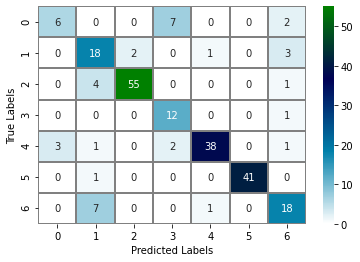

In [20]:
#confusion matrix of date classification using decision tree model 

sns.heatmap(confusion_matrix(y_test,yhat),cmap='ocean_r',annot=True,linewidths=2,linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

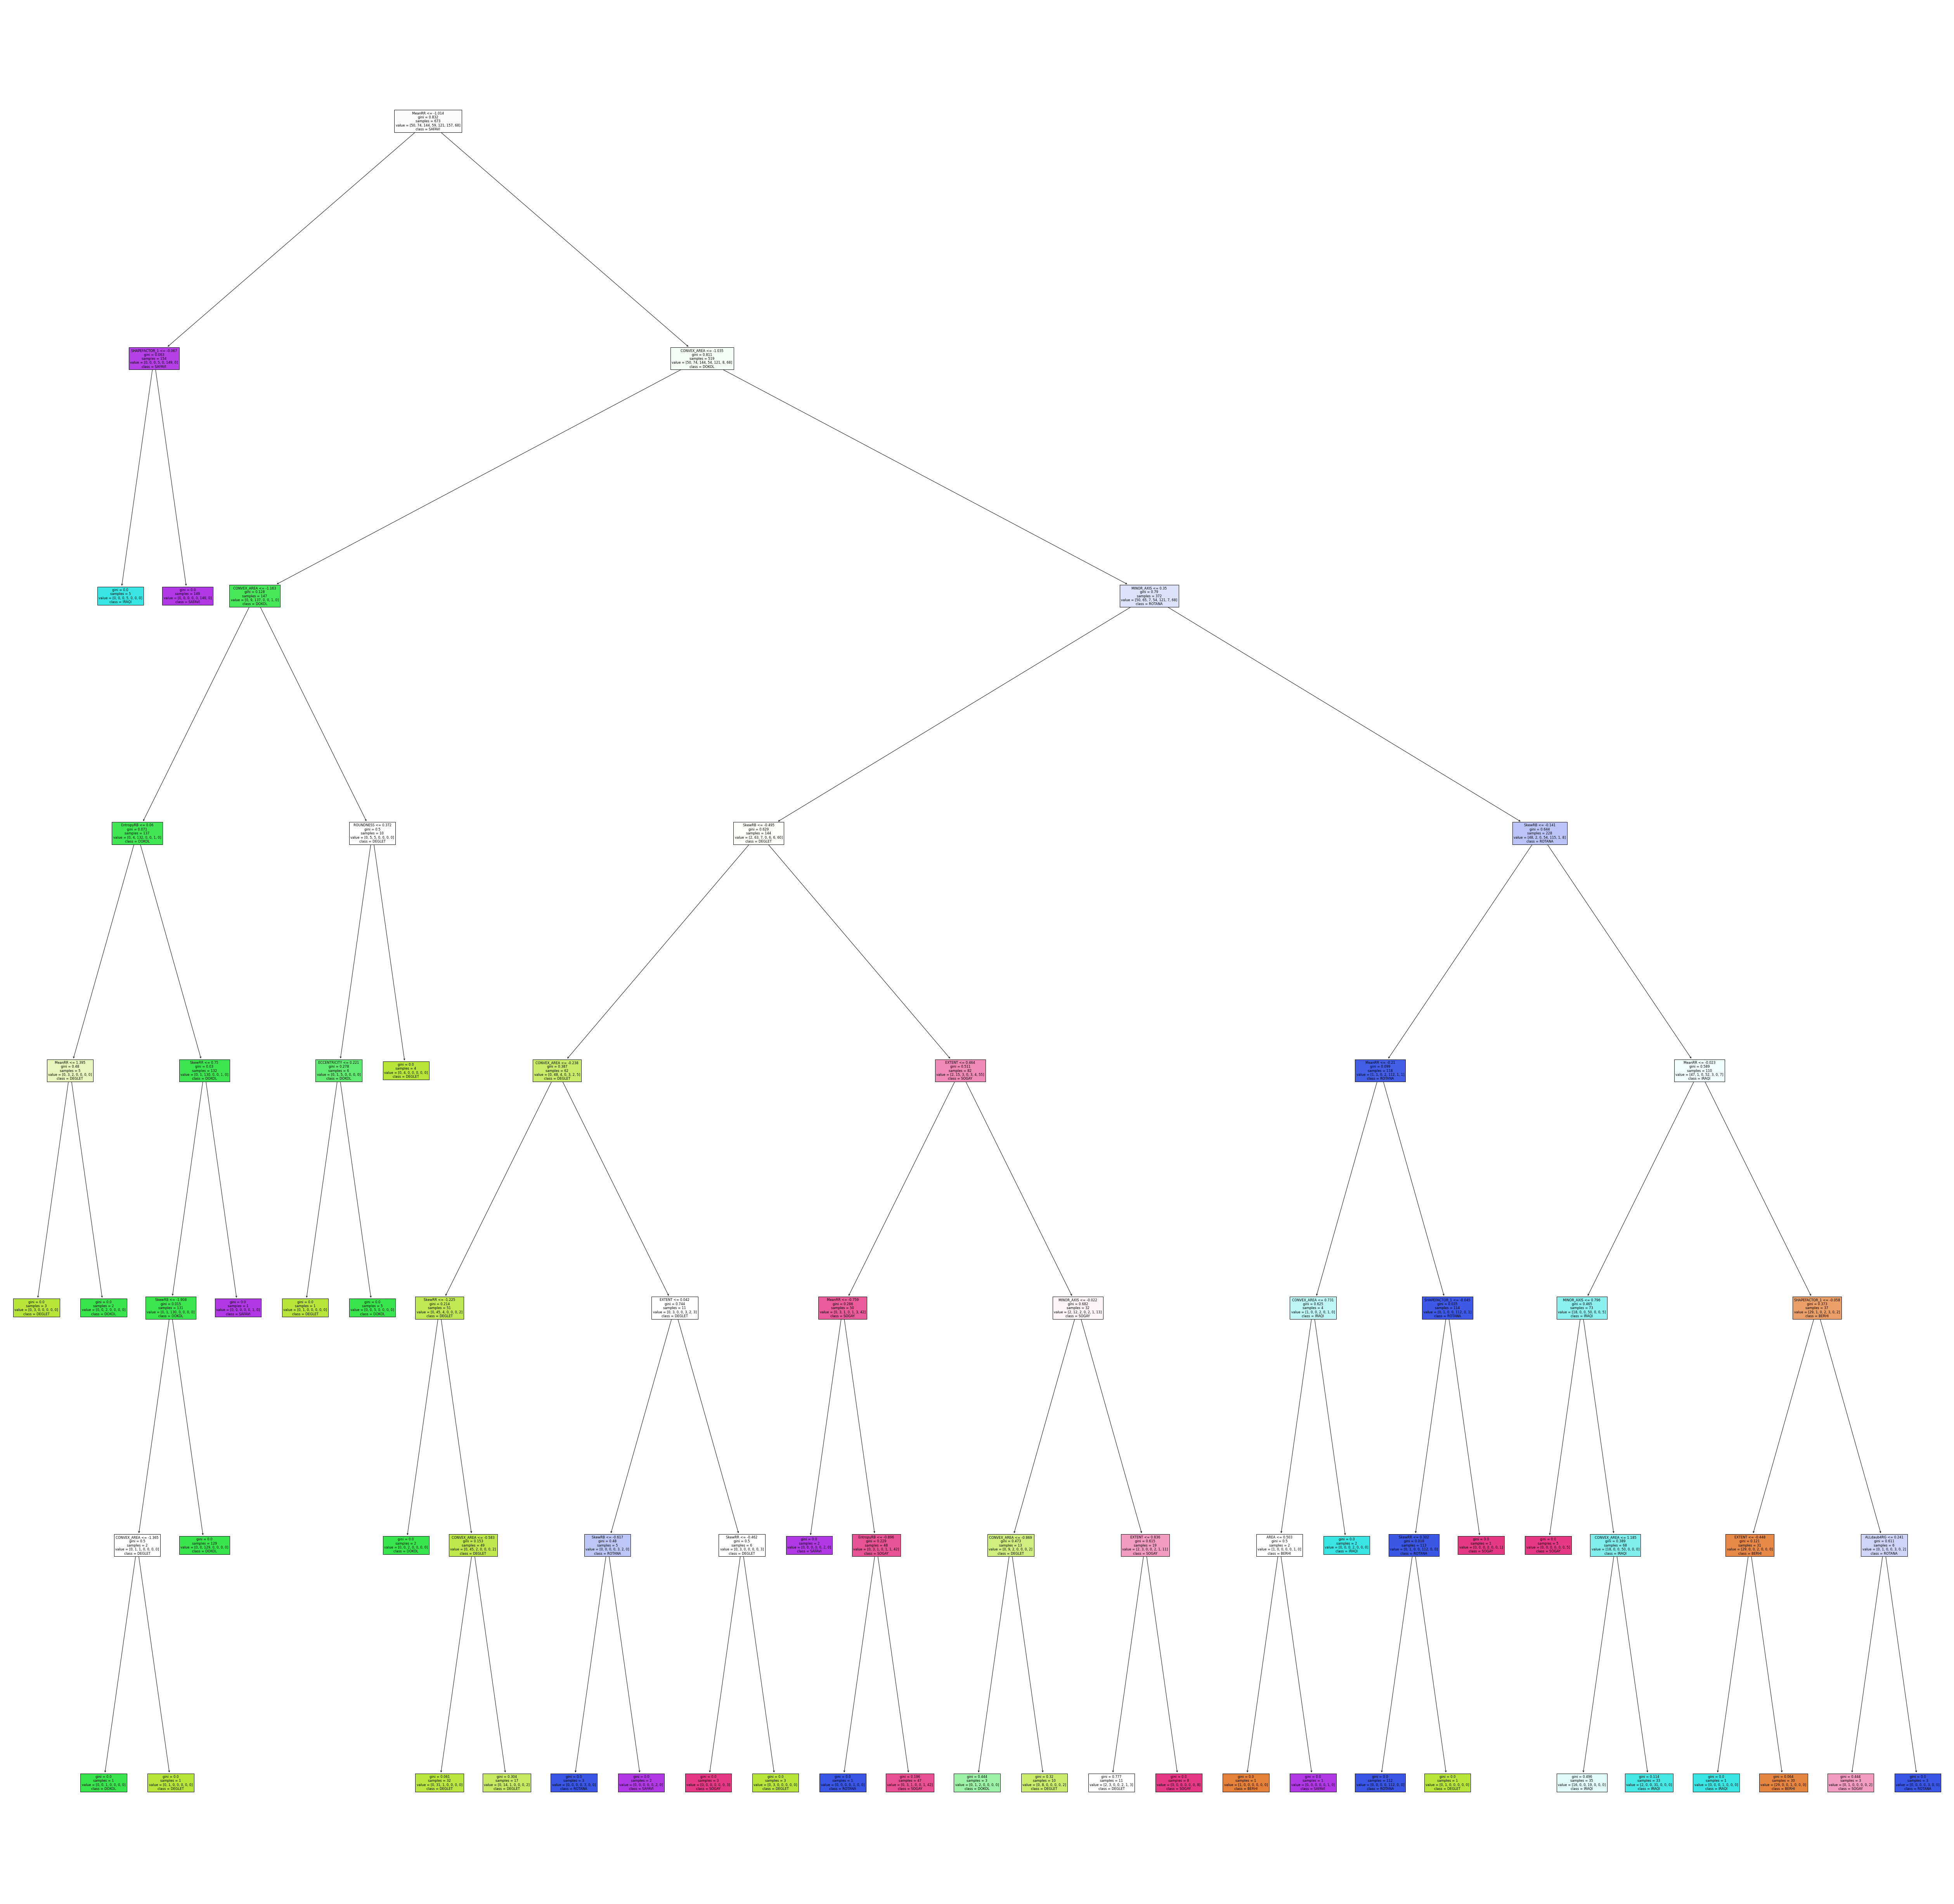

In [21]:
#creating plot of decision tree flow

class_names = ['BERHI', 'DEGLET','DOKOL','IRAQI','ROTANA','SAFAVI','SOGAY']

fig = plt.figure(figsize=(90,90))
_ = tree.plot_tree(dtree, 
                   feature_names=column_names,  
                   class_names=class_names,
                   filled=True)

Above is the decision tree visualized, you will need to double click on the plot to read anyhing, but I think this plot is visually pleasing and also interesting to see how the model classifies.

# Logistic Regression Model

This next portion is a logistic regression model using the same features from the "refined" dataset. With this reduced feature dataset, I beleive that this model will be able to predict the date class with better accuracy than the decision tree model. 

Training Accuracy: 0.924219910846954
Testing Accuracy: 0.9244444444444444
 
Logistic Regression Metrics

              precision    recall  f1-score   support

       BERHI       0.93      0.93      0.93        15
      DEGLET       0.78      0.75      0.77        24
       DOKOL       0.97      0.97      0.97        60
       IRAQI       0.86      0.92      0.89        13
      ROTANA       1.00      0.91      0.95        45
      SAFAVI       1.00      1.00      1.00        42
       SOGAY       0.77      0.88      0.82        26

    accuracy                           0.92       225
   macro avg       0.90      0.91      0.90       225
weighted avg       0.93      0.92      0.93       225



Text(33.0, 0.5, 'True Labels')

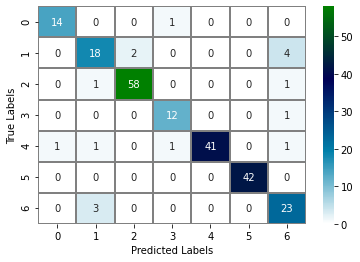

In [22]:
#

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = .25, random_state = 42)

logr = LogisticRegression(C=1,max_iter=150,multi_class='multinomial')
logr.fit(X_train,y_train)
yhat = logr.predict(X_test)

print('Training Accuracy: ' +str(logr.score(X_train,y_train)))
print('Testing Accuracy: ' +str(accuracy_score(yhat, y_test)))
print(' ')

print('Logistic Regression Metrics' + '\n')
print(classification_report(y_test,yhat))

sns.heatmap(confusion_matrix(y_test,yhat),cmap='ocean_r',annot=True,linewidths=2,linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [23]:
coefficients = logr.coef_[0]
log_importance = pd.DataFrame(coefficients, index = column_names, columns = ['Coefficients'])
log_importance.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
SkewRB,2.564198
ROUNDNESS,1.797972
MINOR_AXIS,0.675614
AREA,0.595965
CONVEX_AREA,0.514746
ALLdaub4RG,0.502335
EXTENT,0.389277
SHAPEFACTOR_1,-0.009537
MeanRR,-0.011287
ECCENTRICITY,-0.649010


We can see that using a logistic regression model, we had a great improvement in testing accuracy. I believe that using the dropped feature dataset reduced the amount of noise in the datset and allowed for the model to use all features given to it. One interesting note, is that the features important to the decision tree model were not the same to the logistic regression model.

# Part One Conclusion 

In total, using a decision tree model to find the features with the highest importance, we were able to acheive over a 90% accuracy on our test set with a logistic regression model. I beleive the approach I had to this dataset is a good way to reduce the noise in the dataset. We were able to reduce the original 34 features down to 12 that had the most weight when it came to classification. From there, our logistic regression model gave us even better results than the original decision tree model. With a large amount of features, it can be hard to decide what to use for input, letting a model decide these important features for us allowed me to quickly and accurately get results from a different model. 

I didn't have many issues with this portion of the project, the data was clean and usable, since it was originally created for model training and testing. One issue that I did have was the data didn't have any explanations on what some of the features meant. Some features had RB, RR, and RG atteached to the end and it was unclear what these meant. Whether I missed this in the description on kaggle I'm not sure but I felt a bit lost when looking at some of the features. 

Overall, I am happy with part one of this project, it was the highest accuracy I have had on any model that I have created with unknown data, so I am proud of what I acheived.